In [5]:
import nltk #biblioteca de conversão textos para Python

from nltk.corpus import stopwords # palavras que podem ser filtradas do texto

# Demais bibliotecas que trabalham com operações em palavras
import string
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [6]:
msg = pd.read_csv('spam.csv', encoding='latin-1')

msg = msg.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

msg = msg.rename(columns={'v1': 'type','v2': 'message'})
print(msg)

      type                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [7]:
def cleanText(texto):
    #remove pontuação caractere a caractere
    remove_dots = [char for char in texto if char not in string.punctuation]
    #junta os caracteres em palavras novamente
    remove_dots = ''.join(remove_dots)
    
    #nopunc.split() separa cada frase em palavras, retirando as que estão dentro de stopwords
    #word.lower() torna todas as letras minúsculas
    #essa linha remove as stopwords, retornando apenas as palavras relevantes para a análise
    clean_word = [word for word in remove_dots.split() if word.lower() not in stopwords.words('english')]
        
    return clean_word


In [8]:
msg['length'] = msg['message'].apply(len)

msg['message'].apply(cleanText)
#Divisão entre conjutos de treino e teste: msg_train, msg_test
#class_train e class_test são os rótulos de treinamento e teste
msg_train, msg_test, class_train, class_test = train_test_split(msg['message'], msg['type'], test_size=0.1)

# Passo a passo de como será feita a preparação: é analisado o arquivo de texto, contando a ocorrência de cada palavra
# Em seguida vem a normalização da contagem e transforma os dados para que fiquem menores durante o treinamento
# O classificador em Naive Bayes é iniciado para treinar os vetores 

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = cleanText)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

#Treinamento do modelo
pipeline.fit(msg_train, class_train)

#Teste do modelo
predictions = pipeline.predict(msg_test)

print(classification_report(class_test, predictions))


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       497
        spam       1.00      0.74      0.85        61

    accuracy                           0.97       558
   macro avg       0.98      0.87      0.92       558
weighted avg       0.97      0.97      0.97       558



array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

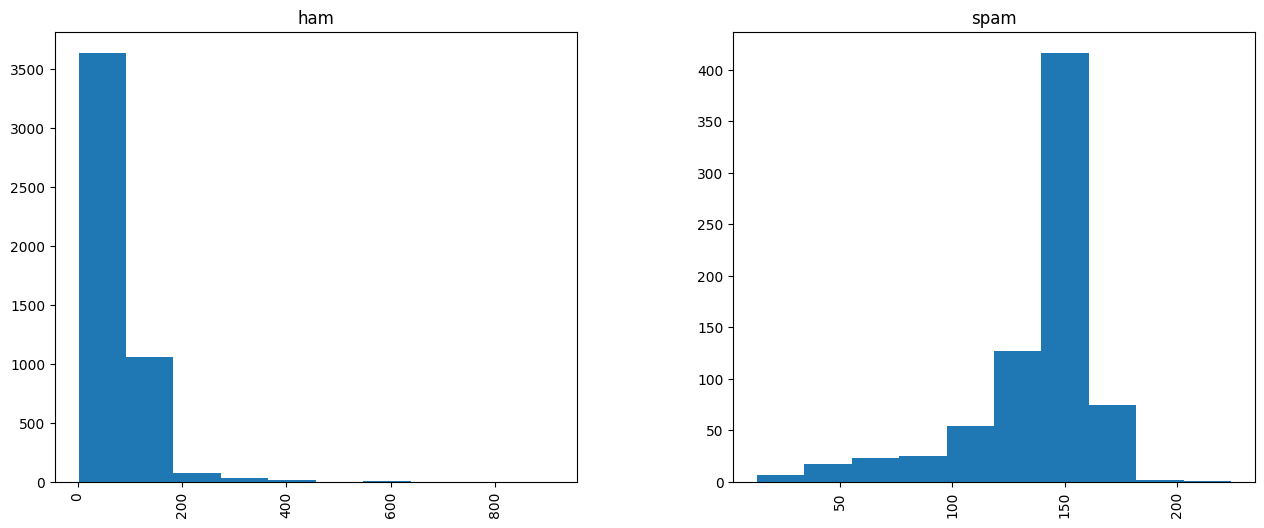

In [12]:
msg.hist(column='length', by='type', figsize=(15,6))